In [1]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.image as mpimg
import os
import cv2
from PIL import Image, ImageEnhance
from keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split

In [2]:
path = r"D:\Kuliah\Tugas, PPT, Buku Kuliah\Semester 5\Data Mining II\Project"

# Data Preprocessing


## Resize Image

In [ ]:
abjad = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
for i in abjad:
    path_abjad = path+"/"+i
    for j in os.listdir(path_abjad):
        if j[8:] == '.JPG':
            a = j.replace(".JPG",'.jpg')
            os.rename(path_abjad+"/"+j,path_abjad+"/"+a)
            print(j, "berhasil di rename")

In [ ]:
abjad = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
for i in abjad:
    path_abjad = path+"/"+i
    path_re = path+"/Image Resize/"+i
    isExist = os.path.exists(path_re)
    if not isExist:
        os.mkdir(path_re)
        print(path_re,"is created!")
    for gambar in os.listdir(path_abjad):
        img_re = path+'/'+i+'/'+gambar
        resize = path+f"/Image Resize/{i}/"+gambar
        img = Image.open(img_re)
        img = img.resize((250,250))
        img.save(resize)
    print("Abjad",i,"Selesai!")

/content/drive/MyDrive/SIBI/Image Resize/A is created!
Abjad A Selesai!
/content/drive/MyDrive/SIBI/Image Resize/B is created!
Abjad B Selesai!
/content/drive/MyDrive/SIBI/Image Resize/C is created!
Abjad C Selesai!
/content/drive/MyDrive/SIBI/Image Resize/D is created!
Abjad D Selesai!
/content/drive/MyDrive/SIBI/Image Resize/E is created!
Abjad E Selesai!
/content/drive/MyDrive/SIBI/Image Resize/F is created!
Abjad F Selesai!
/content/drive/MyDrive/SIBI/Image Resize/G is created!
Abjad G Selesai!
/content/drive/MyDrive/SIBI/Image Resize/H is created!
Abjad H Selesai!
/content/drive/MyDrive/SIBI/Image Resize/I is created!
Abjad I Selesai!
/content/drive/MyDrive/SIBI/Image Resize/J is created!
Abjad J Selesai!
/content/drive/MyDrive/SIBI/Image Resize/K is created!
Abjad K Selesai!
/content/drive/MyDrive/SIBI/Image Resize/L is created!
Abjad L Selesai!
/content/drive/MyDrive/SIBI/Image Resize/M is created!
Abjad M Selesai!
/content/drive/MyDrive/SIBI/Image Resize/N is created!
Abjad N S

In [15]:
abjad = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
for i in abjad:
    path_abjad = os.listdir(path+f"/Image Resize/{i}")
    print(i,":",len(path_abjad))

A : 25
B : 25
C : 25
D : 25
E : 25
F : 25
G : 25
H : 25
I : 25
J : 25
K : 25
L : 25
M : 25
N : 25
O : 25
P : 25
Q : 25
R : 25
S : 25
T : 25
U : 25
V : 25
W : 25
X : 25
Y : 25
Z : 25


## Visualize Image

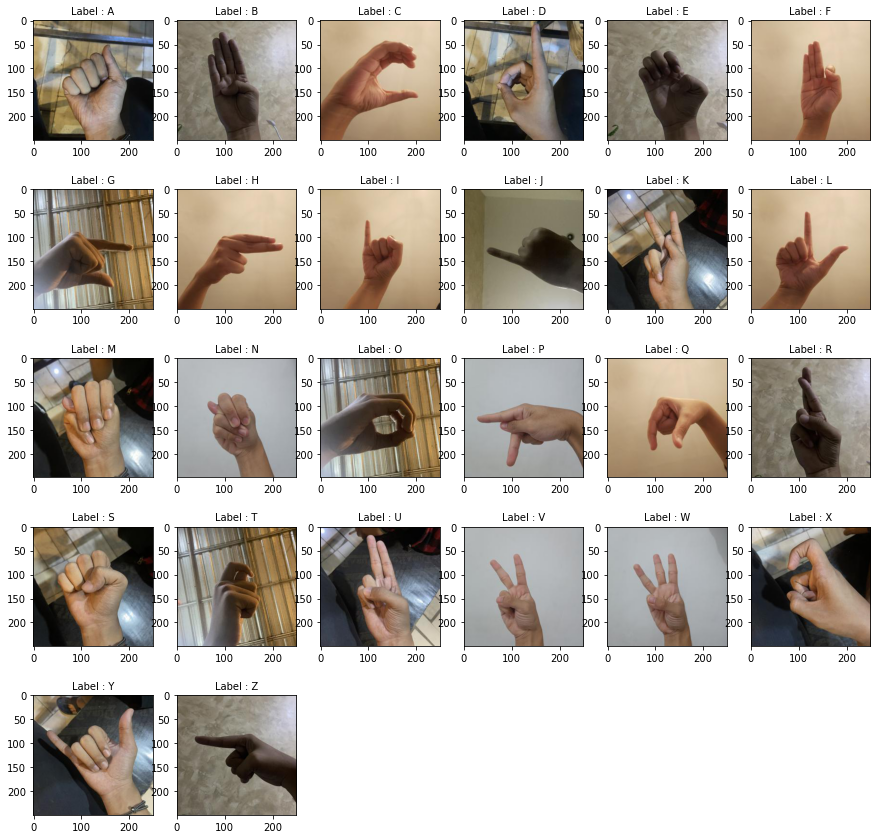

In [7]:
plt.figure(figsize=(15,15))
for i in range(1,27):
  path_re = path+"/Image Resize/"+abjad[i-1]
  lst_img = os.listdir(path_re)
  plt.subplot(5,6,i)
  image = mpimg.imread(path_re+f"/{lst_img[np.random.randint(0,20)]}")
  plt.imshow(image)
  plt.title(f'Label : {abjad[i-1]}', fontsize=10)
plt.show()


## Data Augmentation

In [ ]:
def rgb(img):
    return (cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [18]:
for i in abjad:
  path_re = path+"/Image Resize/"+i
  path_aug = path+"/Image Augmentation/"+i
  if i in ['G','Q','I','J']:
    datagen = ImageDataGenerator(
        rotation_range = 15,
        zoom_range = 0.1,
        horizontal_flip = True,
        brightness_range=[0.2,1])
  else:
    datagen = ImageDataGenerator(
        rotation_range = 30,
        zoom_range = 0.1,
        horizontal_flip = True,
        brightness_range=[0.2,1])
  for gambar in os.listdir(path_re):
    x = cv2.imread(f"{path_re}/{gambar}")
    x = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)
    x = x.reshape((1, ) + x.shape) 
    j = 0
    for batch in datagen.flow(x, batch_size = 1, save_to_dir = path_aug, save_format ='jpg'):
      j += 1
      if j == 20:
        break
        
  print(f'Abjad {i} Selesai!')

Abjad A Selesai!
Abjad B Selesai!
Abjad C Selesai!
Abjad D Selesai!
Abjad E Selesai!
Abjad F Selesai!
Abjad G Selesai!
Abjad H Selesai!
Abjad I Selesai!
Abjad J Selesai!
Abjad K Selesai!
Abjad L Selesai!
Abjad M Selesai!
Abjad N Selesai!
Abjad O Selesai!
Abjad P Selesai!
Abjad Q Selesai!
Abjad R Selesai!
Abjad S Selesai!
Abjad T Selesai!
Abjad U Selesai!
Abjad V Selesai!
Abjad W Selesai!
Abjad X Selesai!
Abjad Y Selesai!
Abjad Z Selesai!


In [22]:
abjad = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
for i in abjad:
    path_abjad = os.listdir(path+f"/Image Augmentation/{i}")
    print(i,":",len(path_abjad))

A : 513
B : 511
C : 511
D : 516
E : 511
F : 507
G : 514
H : 513
I : 510
J : 513
K : 512
L : 519
M : 513
N : 515
O : 510
P : 515
Q : 513
R : 501
S : 513
T : 516
U : 515
V : 513
W : 513
X : 516
Y : 507
Z : 511


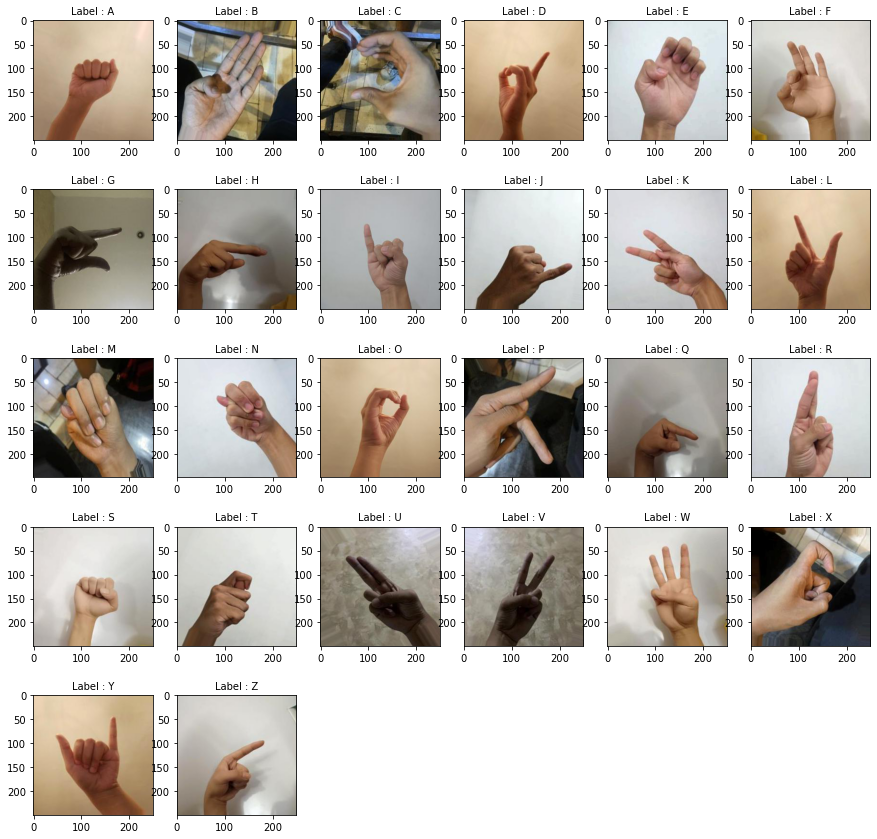

In [10]:
plt.figure(figsize=(15,15))
for i in range(1,27):
  path_re = path+"/Image Resize/"+abjad[i-1]
  lst_img = os.listdir(path_re)
  plt.subplot(5,6,i)
  image = mpimg.imread(path_re+f"/{lst_img[np.random.randint(0,140)]}")
  plt.imshow(image)
  plt.title(f'Label : {abjad[i-1]}', fontsize=10)
plt.show()